## CS441: Applied ML - HW 3

## Part 1: Spam Detection with Naive Bayes Classifier

We want to classify text messages as “spam” (unwanted) or “ham” (genuine). We will use data (spam.csv) from the Kaggle SMS spam dataset. We’ve provided the loading and pre-processing code to generate:
* `unique_words`: the unique set of words in the dataset
* `(x_train, y_train, msg_train)`: counts of words in each message, spam (y=1) or not spam (y=-1) labels, and the message string for each training sample; `x_train[n][j]` is the count of the `j`th word in the `n`th sample.
* `*_val` and `*_test`, similar to above, for the val and test splits
We will use a Naive Bayes Classifier.

See assignment for details (equations are not easy to reproduce here).

In [78]:
import csv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os

from google.colab import drive
drive.mount('/content/drive')
datadir = "/content/drive/My Drive/CS441/hw3/" # choose proper location

files = os.listdir(datadir)
print(files)

# don't change the code below

# read data
with open(datadir + 'spam.csv', encoding='latin-1') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',')
    y = np.zeros((10000,))
    X = []
    n = 0
    rownum = 0
    for row in datareader:
      if rownum == 0:
        rownum += 1
        continue
      rownum += 1
      if row[0]=='ham':
        y[n] = -1
      else:
        y[n] = 1
      X.append(row[1])
      n += 1
y= y[:n]

# y[n] = -1 for ham, 1 for spam
print(y[0])
print(X[0])

# parse the text messages into words and count the words in each row
vectorizer = CountVectorizer(analyzer='word')
word_count = vectorizer.fit_transform(X).toarray()

print(f"We have {word_count.shape[0]} examples with {word_count.shape[1]} unique words.")
unique_words = vectorizer.get_feature_names_out()

# split data into train (50%), validation (25%), and test (25%)
x_train = word_count[::2]
y_train = y[::2]
msg_train = X[::2]
x_val = word_count[1::4]
y_val = y[1::4]
msg_val = X[1::4]
x_test = word_count[3::4]
y_test = y[3::4]
msg_test = X[3::4]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['spam.csv', 'salary.npz', 'CS441_HW3_Solution.ipynb', 'CS441_HW3_Solution.pdf', 'CS441-HW3-Report.gdoc']
-1.0
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
We have 5572 examples with 8672 unique words.


#### 1. Train your Naive Bayes Classifier
I.e. P(y), P(w|y)) using the train set with =1 and compute the accuracy on the val set.  You should get P(y=1)=0.142, P(call|spam) = 0.0104, and P(call|ham)=0.0029. Your validation accuracy should be higher than 95%.

In [79]:
# TO DO
# P(y)
N = len(y_train)
p_y_ham = np.sum(y_train==-1)/N
p_y_spam = np.sum(y_train==1)/N

print(p_y_ham,p_y_spam)


# p(w|y=1)
alpha = 1

# vocabulary
V = x_train.shape[1]
print('V:',V)

# (N,V)
train_spam = x_train[y_train == 1]
train_ham = x_train[y_train == -1]
print('train_spam',train_spam.shape)

# (V,1)
train_spam_freq = np.sum(train_spam,axis = 0)
train_ham_freq = np.sum(train_ham,axis = 0)
print(train_ham_freq.shape)

p_train_spam = (train_spam_freq+alpha)/(alpha*V + np.sum(train_spam_freq))
p_train_ham = (train_ham_freq+alpha)/(alpha*V + np.sum(train_ham_freq))
print('p_train_spam',p_train_spam.shape)

#check  P(call|spam) = 0.0104, and P(call|ham)=0.0029
print(unique_words[3000:3015])
index = np.where(unique_words == 'call')[0][0]
print(index)
print('P(call|spam) = ',p_train_spam[index])
print('P(call|ham) = ',p_train_ham[index])

#validation
# [N,V] [V,1]
def predict(x):
  log_spam = np.log(p_y_spam) + np.sum(x*np.log(p_train_spam),axis = 1) #1
  log_ham = np.log(p_y_ham) + np.sum(x*np.log(p_train_ham),axis = 1)
  return np.where(log_spam > log_ham,1,-1)


y_val_predict = predict(x_val)
accuracy = np.sum(y_val_predict== y_val)/len(y_val)
print(accuracy)




0.8582196697774587 0.14178033022254127
V: 8672
train_spam (395, 8672)
(8672,)
p_train_spam (8672,)
['evenings' 'event' 'events' 'eventually' 'ever' 'every' 'every1'
 'everybody' 'everyboy' 'everyday' 'everyone' 'everyones' 'everyso'
 'everythin' 'everything']
1813
P(call|spam) =  0.010444010053057805
P(call|ham) =  0.0028976666158304102
0.9813352476669059


#### 2. Data exploration
What are the 10 spammiest words (i.e. words with highest  logP(wj|spam)- logP(wj|ham))?  What are the 10 hammiest words? Which val message is the spammiest ham (message with highest spam score but y=-1)? Which is hammiest spam (message with lowest spam score but y=1)?  Spammiest spam? Hammiest ham?

In [80]:
# TO DO
# What are the 10 spammiest words (highest logP(wj|spam)- logP(wj|ham))
#ham -1 spam 1
minus = np.log(p_train_spam)-np.log(p_train_ham)
top_spam_id = np.argsort(minus)[-10:][::-1]
#print(top_spam_id)
top_spam_words = unique_words[top_spam_id]
print(top_spam_words)

#What are the 10 hammiest words
minus2 = np.log(p_train_ham)-np.log(p_train_spam)
top_hamm_id = np.argsort(minus2)[-10:][::-1]
top_ham_words = unique_words[top_hamm_id]
print(top_ham_words)

#spammiest ham
log_spam = np.log(p_y_spam) + np.sum(x_val*np.log(p_train_spam),axis = 1)
log_ham = np.log(p_y_ham) + np.sum(x_val*np.log(p_train_ham),axis = 1)
diff = log_spam - log_ham #diff>0 spam ; <0 ham
sorted_idx = np.argsort(diff)

# y_val[i] == -1 且 diff最大
for i in sorted_idx[::-1]:
  if y_val[i] == -1:
    spammiest_ham_id = i
    break

print("Spammiest ham message:",spammiest_ham_id,":",msg_val[spammiest_ham_id])

#hammiest spam
# y_val[i] == 1 且 diff最小
for i in sorted_idx[::]:
  if y_val[i] == 1:
    hammiest_spam_id = i
    break

print(hammiest_spam_id)
print("Hammiest spam message:",hammiest_spam_id,":",msg_val[hammiest_spam_id])


#Spammiest spam
# y_val[i] == 1 且 diff最大
for i in sorted_idx[::-1]:
  if y_val[i] == 1:
    spammiest_spam_id = i
    break

print(spammiest_spam_id)
print("Spammiest spam message:",spammiest_spam_id,":",msg_val[spammiest_spam_id])


# Hammiest ham
# y_val[i] == -1 且 diff最小

for i in sorted_idx[::]:
  if y_val[i] == -1:
    hammiest_ham_id = i
    break

print(hammiest_ham_id)
print("Hammiest ham message:",hammiest_ham_id,":",msg_val[hammiest_ham_id])


['claim' 'prize' 'uk' '150p' 'www' 'tone' '500' '16' 'cs' '18']
['gt' 'lt' 'he' 'but' 'lor' 'da' 'she' 'later' 'ì_' 'wat']
Spammiest ham message: 579 : Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
854
Hammiest spam message: 854 : LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms
940
Spammiest spam message: 940 : FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+
539
Hammiest ham message: 539 : Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She sa

#### 3. Precision-recall trade-off
You want to flag spam messages with minimal false positives. Using the val set, compute precision/recall and display the PR curve. Programmatically, find the threshold with highest recall, where precision > 0.99.  Report the accuracy, precision, and recall on the test set using the same model and the selected threshold.

[-143.84531774  -93.91936354  -92.83137015 ...   58.13653383   59.28715911
   60.24674703]


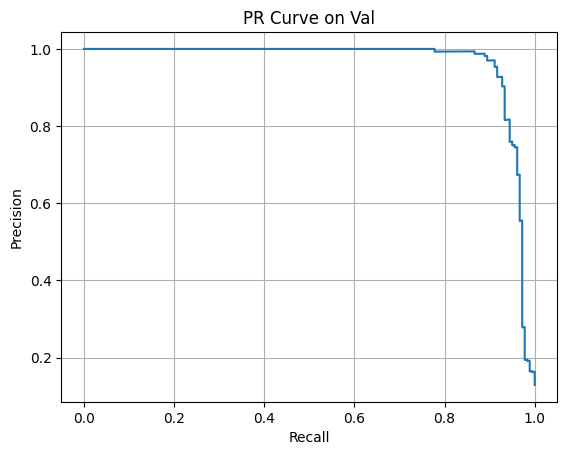

6.095247027449673
Accuracy: 0.9763101220387652  precision: 1.0  recall: 0.8081395348837209


In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score

# TO DO
precisions, recalls, thresholds = precision_recall_curve(y_val==1, diff)
print(thresholds)
plt.plot(recalls, precisions, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve on Val')
plt.grid(True)
plt.show()

precisions_new = precisions[:-1]
recalls_new = recalls[:-1]
mask = precisions_new > 0.99
best_id = np.argmax(recalls_new[mask])
best_threshold = thresholds[mask][best_id]
print(best_threshold)


log_spam_test = np.log(p_y_spam) + np.sum(x_test*np.log(p_train_spam),axis = 1)
log_ham_test = np.log(p_y_ham) + np.sum(x_test*np.log(p_train_ham),axis = 1)
diff_test = log_spam_test - log_ham_test - best_threshold

y_test_pred = np.where(diff_test>0, 1, -1)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy:",accuracy," precision:",precision," recall:",recall)


## Part 2: Robust Estimation

The corrupted salary dataset has three variables: salary, years, school.  Salary is the reported salary of each person.  Years is the number of years of experience in the job.  School is the university where the person last had a degree. For the core assignment, we’ll only use salary, and the stretch goals will use the other two variables. Some of the reported salary information is wrong (some incorrect value is provided), so we want to learn things from the data in a way that is robust to the wrong data. We refer to correctly entered data as “valid”.

Estimate the true mean, standard deviation, min, and max of the salaries using three different methods.

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
datadir = "/content/drive/My Drive/CS441/hw3/"

# load data
T = np.load(datadir + 'salary.npz')
(salary, years, school) = (T['salary'], T['years'], T['school'])

Exception ignored in: <function NpzFile.__del__ at 0x7d0309d18180>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/numpy/lib/_npyio_impl.py", line 226, in __del__
    self.close()
  File "/usr/local/lib/python3.12/dist-packages/numpy/lib/_npyio_impl.py", line 221, in close
    self.fid.close()
OSError: [Errno 107] Transport endpoint is not connected


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Assume no noise
Compute the statistics for the data as a whole

In [66]:
# TO DO
salary_mu = np.mean(salary)
salary_std = np.std(salary)
salary_min = np.min(salary)
salary_max = np.max(salary)

print('Mean: {}  Std: {}  Min: {}   Max: {}'.format(salary_mu, salary_std, salary_min, salary_max))

Mean: 123749.835  Std: 61953.77348723623  Min: 64694.0   Max: 611494.0


#### 2. Percentiles
Assume valid data will fall between the 5th and 95th percentile. Adjust estimates of the min and max by assuming that the valid data has a uniform distribution (see lecture on robust fitting).

In [67]:
pct = 0.05

# TO DO
p_low = np.percentile(salary, pct*100)   # 5th percentile
p_high = np.percentile(salary, (1-pct)*100)  # 95th percentile

salary_min = p_low - (p_high - p_low) * pct / (1 - 2*pct)
salary_max = p_high + (p_high - p_low) * pct / (1 - 2*pct)

salary_inrange = salary[(salary >= p_low) & (salary <= p_high)]
salary_mu = np.mean(salary_inrange)
salary_std = np.std(salary_inrange)



print('Mean: {}  Std: {}  Min: {}   Max: {}'.format(salary_mu, salary_std, salary_min, salary_max))

Mean: 113878.65  Std: 15876.450453939286  Min: 75493.8   Max: 159900.79999999973


#### 3. EM
Assume valid data follows a Gaussian distribution, while the fake data has a uniform distribution between the minimum and maximum value of salary. For mean and std, report the estimated mean and std of the valid salary distribution. For min and max, report the min and max salaries that have greater than 50% chance of being valid. Also report the estimated probability that a random sample is valid, and the first five indices of salaries that are not likely to be valid.

In [68]:

# TO DO
a, b = np.min(salary), np.max(salary)

mu = np.mean(salary)
sigma = np.std(salary)
fraction = 0.9 #valid/all
max_iter = 200
threshold = 1e-6

for it in range(max_iter):
  mu_old = mu
  sigma_old = sigma
  fraction_old = fraction

  #E
  gauss_pdf = (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(salary - mu)**2 / (2*sigma**2)) # gaussiaon
  uniform_pdf = 1/(b - a)  # uniform
  w = fraction* gauss_pdf / (fraction * gauss_pdf + (1-fraction)* uniform_pdf)  # probability from gaussiaon

  #M update parameters
  mu = np.sum(w * salary) / np.sum(w)
  sigma = np.sqrt(np.sum(w * (salary - mu)**2) / np.sum(w))
  fraction = np.mean(w)

  if np.abs(mu - mu_old) < threshold and np.abs(sigma - sigma_old) < threshold and np.abs(fraction - fraction_old) < threshold:
    print('iter stopped:',it)
    break

# 输出均值和标准差
salary_mu = mu
salary_std = sigma

valid_indices = np.where(w > 0.5)[0]
salary_min = np.min(salary[valid_indices])
salary_max = np.max(salary[valid_indices])


print('Mean: {}  Std: {}  Min: {}   Max: {}'.format(salary_mu, salary_std, salary_min, salary_max))


#report the estimated probability that a random sample is valid
print('Estimated probability:',fraction)

# print the first five indices of salaries that are not likely to be valid
print(np.where(w<0.5)[0][:5])

iter stopped: 16
Mean: 111984.38462965415  Std: 17966.362797759164  Min: 64694.0   Max: 169008.0
Estimated probability: 0.941863076731616
[ 18  28  49 127 128]


## Part 3: Stretch Goals
Include all your code used for any stretch goals in this section. Add headings where appropriate.

a. For spam detection, try to improve your recall on the test set, still using a threshold that gives at least 99% precision on the val set. You can try adjusting , using different classifiers, or using different parameters in CountVectorizer, which is called in the starter code using a simple setting. Maybe it would help to consider all numbers the same, etc. Points are awarded based on what is tried [5-15 pts] and whether successful [5 points].


previos outcome : recall: 0.8081395348837209


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['spam.csv', 'salary.npz', 'CS441_HW3_Solution.ipynb', 'CS441_HW3_Solution.pdf', 'CS441-HW3-Report.gdoc']
-1.0
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
We have 5572 examples with 7979 unique words.
0.8582196697774587 0.14178033022254127
V: 7979
0.9734386216798278
[-143.84531774  -93.91936354  -92.83137015 ...   58.13653383   59.28715911
   60.24674703]


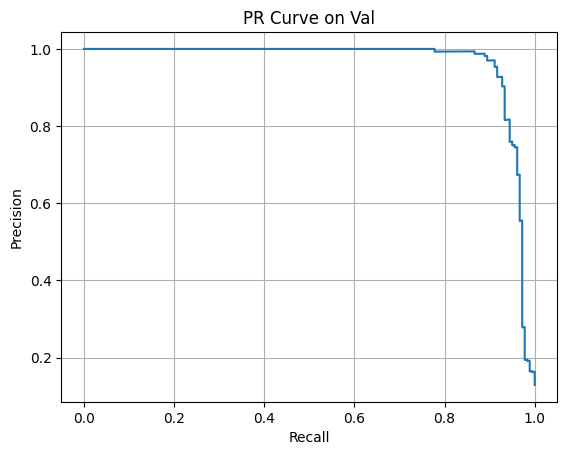

6.095247027449673
Accuracy: 0.990667623833453  precision: 1.0  recall: 0.9244186046511628


In [99]:
# TO DO (optional)

import csv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os
import re

from google.colab import drive
drive.mount('/content/drive')
datadir = "/content/drive/My Drive/CS441/hw3/" # choose proper location

files = os.listdir(datadir)
print(files)

# don't change the code below

# read data
with open(datadir + 'spam.csv', encoding='latin-1') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',')
    y = np.zeros((10000,))
    X = []
    n = 0
    rownum = 0
    for row in datareader:
      if rownum == 0:
        rownum += 1
        continue
      rownum += 1
      if row[0]=='ham':
        y[n] = -1
      else:
        y[n] = 1
      row[1] = re.sub(r'\d+', 'NUMBER', row[1])
      X.append(row[1])
      n += 1
y= y[:n]

# y[n] = -1 for ham, 1 for spam
print(y[0])
print(X[0])

# parse the text messages into words and count the words in each row
########## using stop words = english ##################
#vectorizer = CountVectorizer(analyzer='word',stop_words='english') # improve from 0.808 to 0.831

vectorizer = CountVectorizer(analyzer='word') #

word_count = vectorizer.fit_transform(X).toarray()

print(f"We have {word_count.shape[0]} examples with {word_count.shape[1]} unique words.")
unique_words = vectorizer.get_feature_names_out()

# split data into train (50%), validation (25%), and test (25%)
x_train = word_count[::2]
y_train = y[::2]
msg_train = X[::2]
x_val = word_count[1::4]
y_val = y[1::4]
msg_val = X[1::4]
x_test = word_count[3::4]
y_test = y[3::4]
msg_test = X[3::4]


# TO DO
# P(y)
N = len(y_train)
p_y_ham = np.sum(y_train==-1)/N
p_y_spam = np.sum(y_train==1)/N

print(p_y_ham,p_y_spam)


# p(w|y=1)
alpha = 0.07

# vocabulary
V = x_train.shape[1]
print('V:',V)

# (N,V)
train_spam = x_train[y_train == 1]
train_ham = x_train[y_train == -1]

# (V,1)
train_spam_freq = np.sum(train_spam,axis = 0)
train_ham_freq = np.sum(train_ham,axis = 0)

p_train_spam = (train_spam_freq+alpha)/(alpha*V + np.sum(train_spam_freq))
p_train_ham = (train_ham_freq+alpha)/(alpha*V + np.sum(train_ham_freq))


#validation
# [N,V] [V,1]
def predict(x):
  log_spam = np.log(p_y_spam) + np.sum(x*np.log(p_train_spam),axis = 1) #1
  log_ham = np.log(p_y_ham) + np.sum(x*np.log(p_train_ham),axis = 1)
  return np.where(log_spam > log_ham,1,-1)


y_val_predict = predict(x_val)
accuracy = np.sum(y_val_predict== y_val)/len(y_val)
print(accuracy)



import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score

# TO DO
precisions, recalls, thresholds = precision_recall_curve(y_val==1, diff)
print(thresholds)
plt.plot(recalls, precisions, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve on Val')
plt.grid(True)
plt.show()

precisions_new = precisions[:-1]
recalls_new = recalls[:-1]
mask = precisions_new > 0.99
best_id = np.argmax(recalls_new[mask])
best_threshold = thresholds[mask][best_id]
print(best_threshold)


log_spam_test = np.log(p_y_spam) + np.sum(x_test*np.log(p_train_spam),axis = 1)
log_ham_test = np.log(p_y_ham) + np.sum(x_test*np.log(p_train_ham),axis = 1)
diff_test = log_spam_test - log_ham_test - best_threshold

y_test_pred = np.where(diff_test>0, 1, -1)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy:",accuracy," precision:",precision," recall:",recall)


In [100]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# install can take a minute

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/MyDrive/CS441/hw3" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_HW3_Solution.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")

Mounted at /content/drive/
PDF CREATED: /content/drive/MyDrive/CS441/hw3/CS441_HW3_Solution.pdf
